Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

fi = PolynomialFeatures(1).fit_transform(X)
print(fi)


[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg

#1
fi_trans = np.transpose(fi)
mul_inv = linalg.inv(np.dot(fi_trans, fi) )
w = np.dot( np.dot(mul_inv, fi_trans), y)
print(w)

#2
fi_plus = linalg.pinv(fi)
w = np.dot(fi_plus, y)
print(w)



[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

2.042857142857143
4.085714285714286


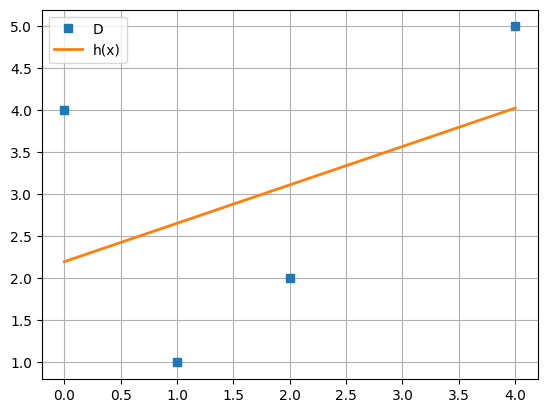

In [5]:
from sklearn.metrics import mean_squared_error

h = np.dot(fi,w)
#funkcijom
mse = mean_squared_error(y,h)
print(mse)

#ručno
rezidual = (y - h) * (y-h)
sum = 0
for elem in rezidual:
    sum += elem
sum = sum/2
print(sum)

plt.plot(X, y, 's', X, h, linewidth = 2)
plt.legend(['D', 'h(x)'], loc='upper left')
plt.grid()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:

#fi_inv = linalg.inv(fi)

fi = PolynomialFeatures(3).fit_transform(X)
print(fi)
fi_inv = linalg.inv(fi)
print(fi_inv)


[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[[ 1.          0.          0.          0.        ]
 [-1.75        2.66666667 -1.          0.08333333]
 [ 0.875      -2.          1.25       -0.125     ]
 [-0.125       0.33333333 -0.25        0.04166667]]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(fi, y)
print(reg.coef_)
print(reg.intercept_)

pred = reg.predict(fi)
err2 = mean_squared_error(y,pred)
print()
print("err = ",err2)
print(pred)


[ 0.         -5.91666667  3.375      -0.45833333]
4.000000000000034

err =  4.845578110320065e-28
[4. 1. 2. 5.]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    y = f(X) + np.random.normal(0,noise, (len(X),1))  #50x1 matrica
    return y
# Vaš kôd 

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
f = lambda x: 5+x-2*pow(x,2)-5*pow(x,3)
X = make_instances(-5,5,50)
y = make_labels(X,f,200)


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

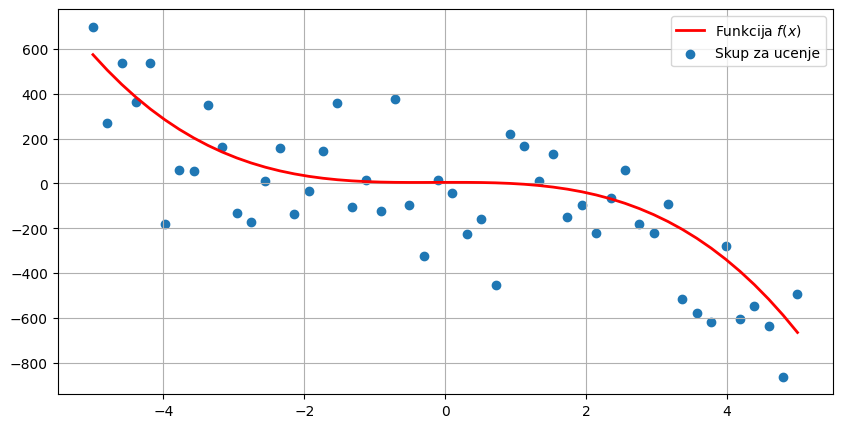

In [11]:
# Vaš kôd ovdje
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(X, f(X), 'r', linewidth = 2, label = 'Funkcija $f(x)$')
plt.scatter(X, y, label = 'Skup za ucenje')
plt.legend(loc = 'upper right');

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

35751.25525337602


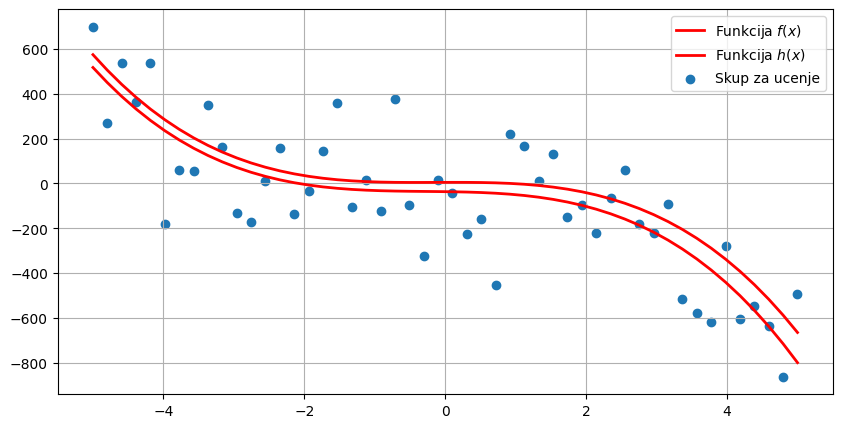

In [12]:
# Vaš kôd ovdje
fi = PolynomialFeatures(3).fit_transform(X)
fi_plus = linalg.pinv(fi)
w = np.dot(fi_plus, y)
h = np.dot(fi,w)

err = mean_squared_error(y,h)
print(err)

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(X, f(X), 'r', linewidth = 2, label = 'Funkcija $f(x)$', color = Blue)
plt.plot(X, h, 'r', linewidth = 2, label = 'Funkcija $h(x)$')
plt.scatter(X, y, label = 'Skup za ucenje');
plt.legend(loc = 'upper right');

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

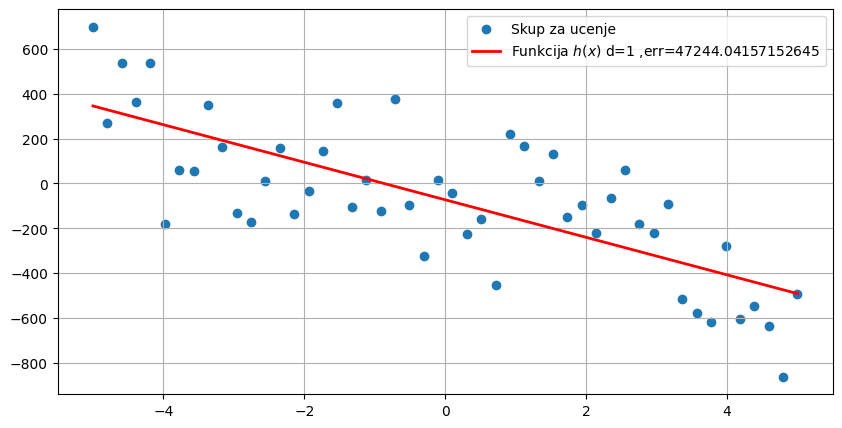

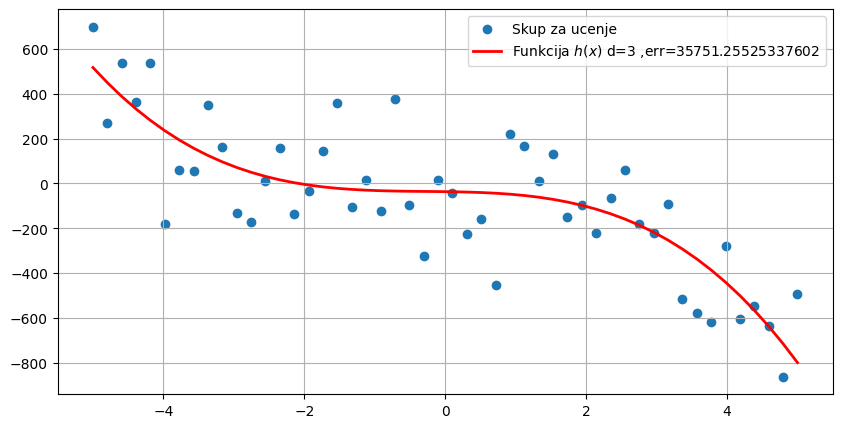

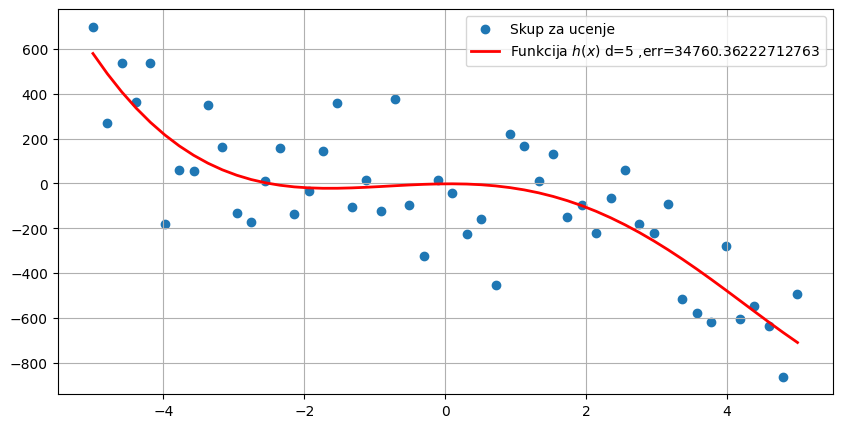

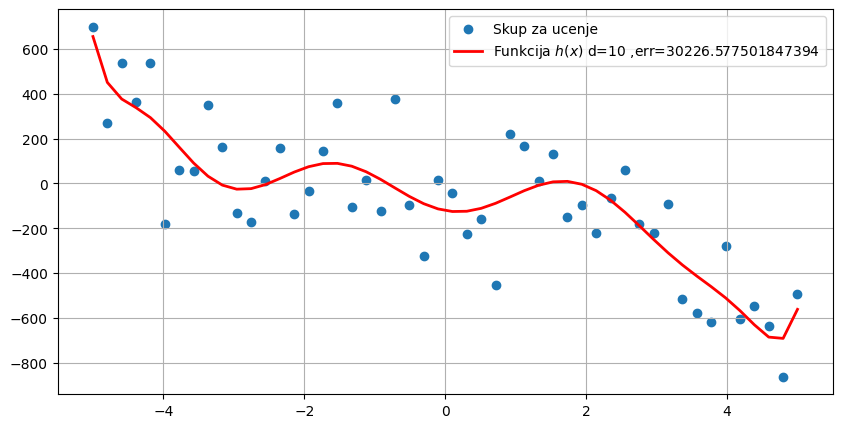

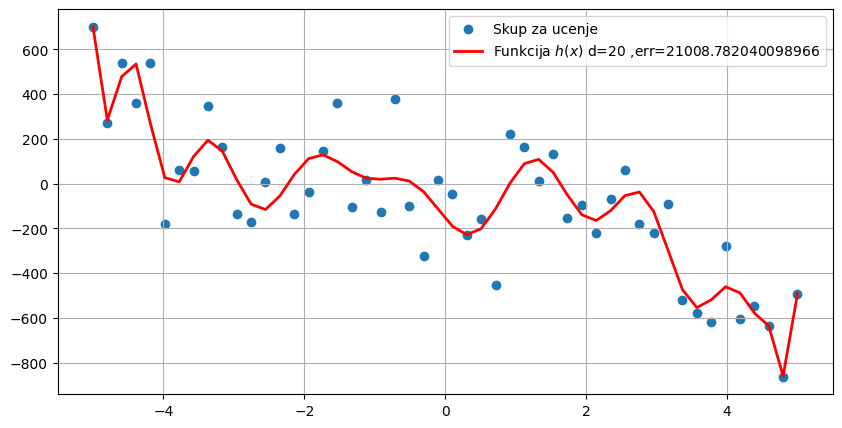

In [13]:
# Vaš kôd ovdje
ds = [1,3,5,10,20]
for d in ds :
    fi = PolynomialFeatures(d).fit_transform(X)
    fi_plus = linalg.pinv(fi)
    w = np.dot(fi_plus, y)
    h = np.dot(fi,w)
    err = mean_squared_error(y,h)
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.scatter(X, y, label = 'Skup za ucenje')
    plt.plot(X, h, 'r', linewidth = 2, label = 'Funkcija $h(x)$ d='+str(d) + " ,err="+str(err))
    plt.legend(loc = 'upper right')



    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

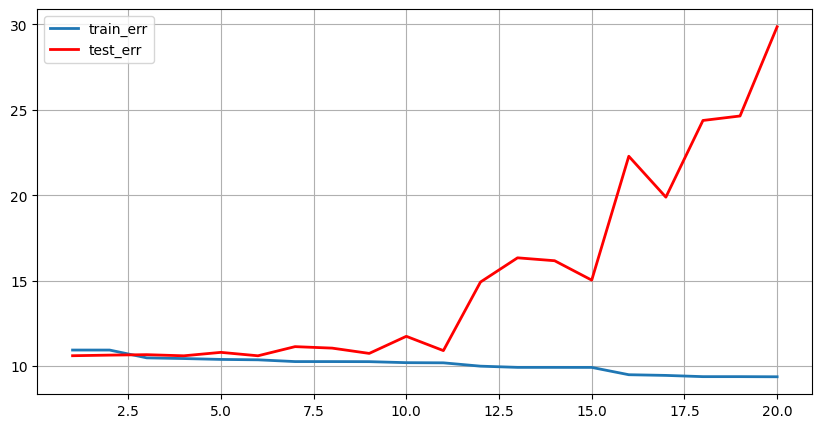

In [14]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X5b, y5b = X, y
X_train,X_test, y_train, y_test = train_test_split(X,y,          
                                                test_size=0.5)
err_train_array = []
err_test_array = []
plt.figure(figsize=(10,5))
plt.grid()
ds = np.arange(1, 21)

for d in ds:
    fi_train = PolynomialFeatures(d).fit_transform(X_train)
    fi_test = PolynomialFeatures(d).fit_transform(X_test)
    fi_plus = linalg.pinv(fi_train)
    w = np.dot(fi_plus, y_train)
    h_train = np.dot(fi_train,w)
    h_test = np.dot(fi_test,w)

    err_train = mean_squared_error(y_train,h_train)
    err_test = mean_squared_error(y_test,h_test)
    err_train_array.append(np.log(err_train))
    err_test_array.append(np.log(err_test))
   
plt.plot(ds,  err_train_array ,  linewidth = 2 , label = "train_err")
plt.plot(ds,  err_test_array , 'r', linewidth = 2, label = "test_err" )
plt.legend()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

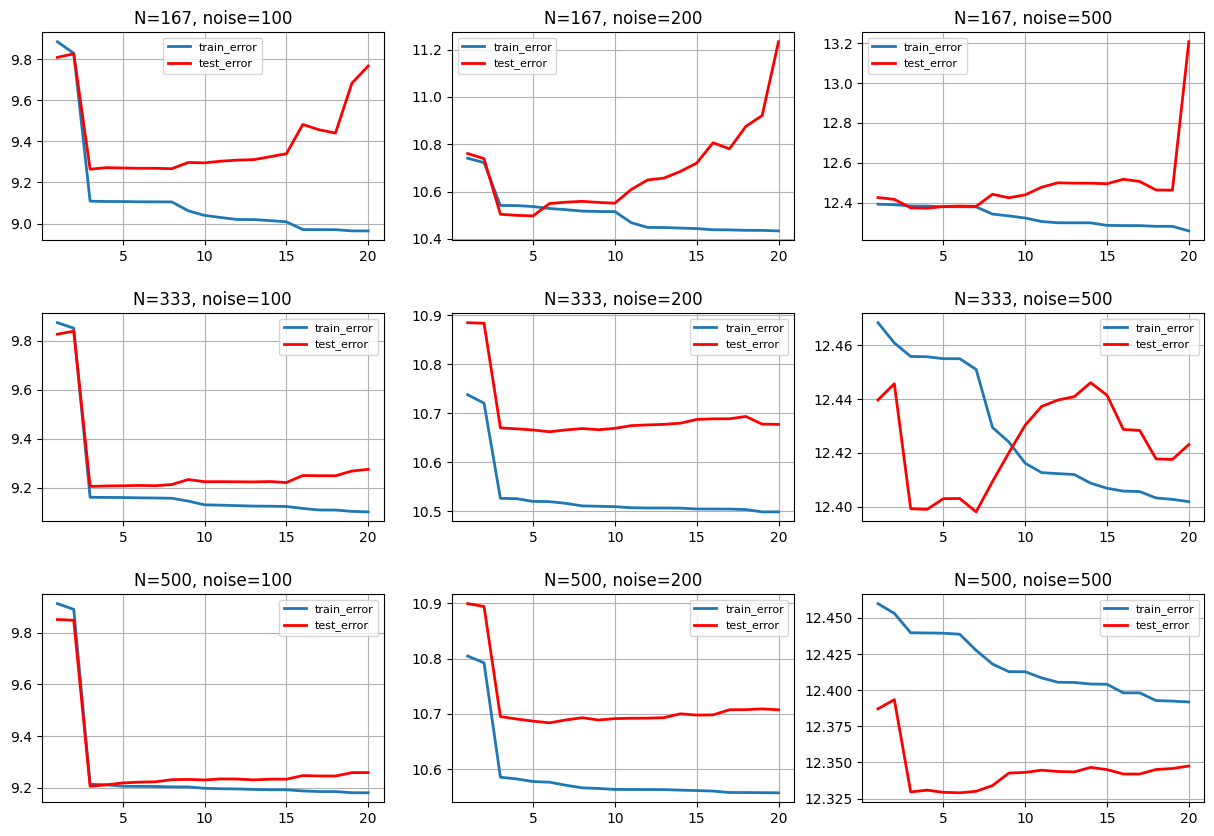

In [15]:
# Vaš kôd ovdje
X = make_instances(-5,5,1000)
ys = [make_labels(X,f,100), make_labels(X,f,200), make_labels(X,f,500)]

noise=[100,200,500]
N = [167,333,500]
X_train, X_test = train_test_split(X , test_size = 0.5)

ys_train, ys_test =\
    ([make_labels(X_train,f,100),make_labels(X_train,f,200),make_labels(X_train,f,500)],
     [make_labels(X_test,f,100),make_labels(X_test,f,200),make_labels(X_test,f,500)]) 

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(wspace=0.2, hspace = 0.35) 
k = 1

for n in N :
    Xt_train = X_train[0:n]
    Xt_test = X_test[0:n]
    for i in range(0,3):
        yt_train = ys_train[i][0:n]
        yt_test = ys_test[i][0:n]
        
        err_train_array, err_test_array = [],[]
        for d in ds:
            fi_train = PolynomialFeatures(d).fit_transform(Xt_train)
            fi_test = PolynomialFeatures(d).fit_transform(Xt_test)
            fi_plus = linalg.pinv(fi_train)
            w = np.dot(fi_plus, yt_train)
            h_train = np.dot(fi_train,w)
            h_test = np.dot(fi_test,w)

            err_train_array.append(mean_squared_error(yt_train,h_train))
            err_test_array.append(mean_squared_error(yt_test,h_test))
        
        ax = fig.add_subplot(3,3,k)
        k+=1
        ax.grid()
        ax.plot(ds, np.log( err_train_array ),  linewidth = 2)
        ax.plot(ds, np.log( err_test_array ), 'r', linewidth = 2)
        ax.legend(['train_error','test_error' ],loc='best', prop={'size':8})
        ax.set_title("N="+str(n)+", noise="+str(noise[i]))

        

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

fi = PolynomialFeatures(3).fit_transform(X)
lam_bda = [0,1,10]

lam_I = np.zeros((3+1,3+1))

for lam in lam_bda:
    gram = np.dot(np.transpose(fi),fi)
    np.fill_diagonal(lam_I,lam)
    lam_I[0][0] = 0
    inv = linalg.inv(gram + lam_I)
    w_i = np.dot(np.dot(inv,np.transpose(fi)), y)
    print(w_i)

    

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for lam in lam_bda:
   
    r = Ridge(alpha=lam).fit(fi,y)
    print(r.coef_)
    print(r.intercept_)

   




[ 0.         -5.91666667  3.375      -0.45833333]
4.000000000000021
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.0569614512471652
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.4944418431229725


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

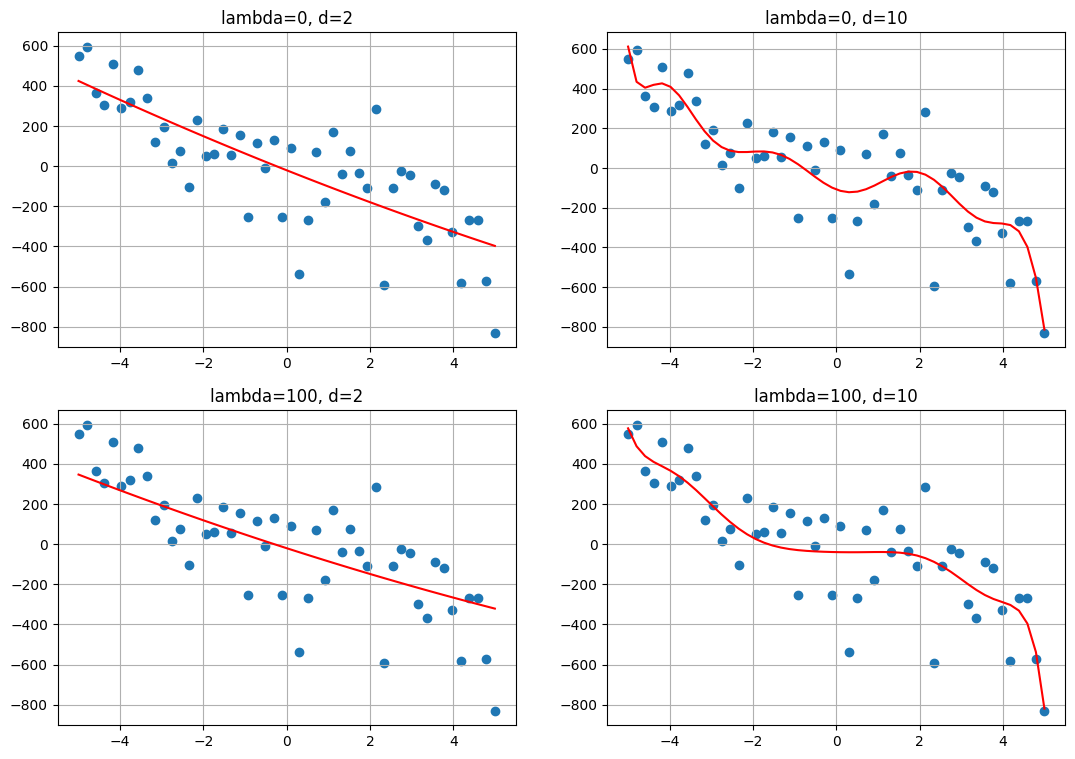

In [18]:
# Vaš kôd ovdje
X = make_instances(-5,5,50)
y = make_labels(X,f,200)
lam_bda = [0,100]
ds = [2,10]

fig = plt.figure(figsize=(13, 9))
fig.subplots_adjust(wspace=0.2, hspace = 0.2) 
k=1
for lam in lam_bda:
    for d in ds:
        fi = PolynomialFeatures(d).fit_transform(X)

        lam_I = np.zeros((d+1,d+1)) 
        
        gram = np.dot(np.transpose(fi),fi)

        np.fill_diagonal(lam_I,lam)
        lam_I[0][0] = 0
        inv = linalg.inv(gram + lam_I)
        w_i = np.dot(np.dot(inv,np.transpose(fi)), y)
        h = np.dot(fi,w_i)
        
        ax = fig.add_subplot(2,2,k)
        k+=1
        plt.scatter(X,y)
        plt.title('lambda='+str(lam) +", d="+str(d))
        plt.grid()
        plt.plot(X,h, 'r')



### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


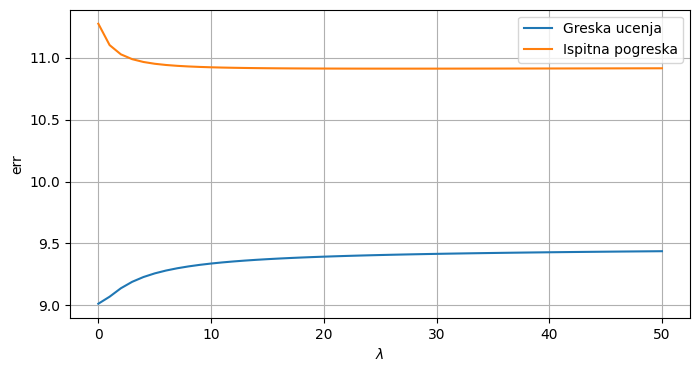

In [19]:
# Vaš kôd ovdje
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)
d=10
lam_bda = range(0,51)
err_train, err_test = [],[]
for lam in lam_bda:
    fi_train = PolynomialFeatures(d).fit_transform(X_train)
    fi_test = PolynomialFeatures(d).fit_transform(X_test)
    
    lam_I = np.zeros((d+1,d+1)) 
    np.fill_diagonal(lam_I,lam)
    lam_I[0][0] = 0
    
    gram = np.dot(np.transpose(fi_train),fi_train)

    inv = linalg.inv(gram + lam_I)

    w_i = np.dot(np.dot(inv,np.transpose(fi_train)), y_train)
    h_train = np.dot(fi_train,w_i)
    h_test = np.dot(fi_test,w_i)
    
    err_train.append(mean_squared_error(y_train,h_train))
    err_test.append(mean_squared_error(y_test,h_test))

plt.figure(figsize=(8,4))
plt.plot(lam_bda, np.log(err_train))
plt.plot(lam_bda, np.log(err_test))
plt.grid(), plt.xlabel('$\lambda$'), plt.ylabel('err');
plt.legend(['Greska ucenja', 'Ispitna pogreska'], loc='best');
    

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

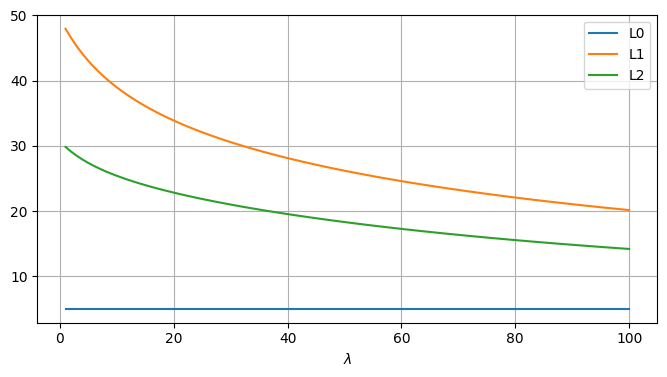

In [21]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
X_train,X_test, y_train, y_test = train_test_split(X5b,y5b,          
                                                test_size=0.5)
d=5
fi_train = PolynomialFeatures(d).fit_transform(X_train)

lam_bda = range(1,101)
l2,l1,l0 = [],[], []

for lam in lam_bda:    

    r = Ridge(alpha = lam).fit(fi_train, y_train)
    w = r.coef_[0]
    
    l0.append(nonzeroes(w))
    l1.append(np.sum(np.abs(w)))
    l2.append(np.sqrt(np.dot(np.transpose(w), w)))


plt.figure(figsize=(8,4))
plt.plot(lam_bda, l0)
plt.plot(lam_bda, l1)
plt.plot(lam_bda, l2)
plt.legend(['L0', 'L1', 'L2'], loc = 'best'); 
plt.grid(); plt.xlabel('$\lambda$');
    

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

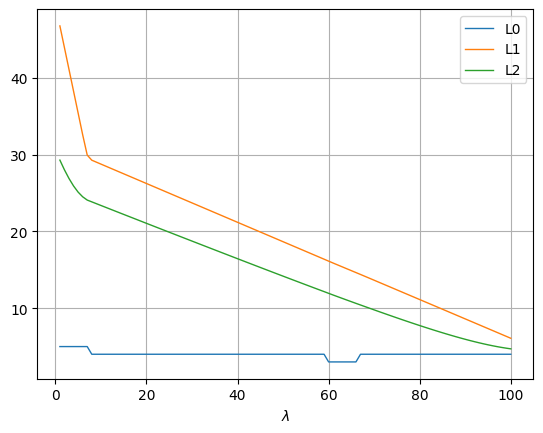

In [22]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
L0 = [];
L1 = [];
L2 = [];

for i in lam_bda:
    lass = Lasso(alpha = i).fit(fi_train, y_train)
    w = lass.coef_
    
    L0.append(nonzeroes(w))
    L1.append(np.sum(np.abs(w)))
    L2.append(np.sqrt(np.dot(np.transpose(w), w)))
    
plt.plot(lam_bda, L0, lam_bda, L1, lam_bda, L2, linewidth = 1);
plt.legend(['L0', 'L1', 'L2'], loc = 'best'); 
plt.grid(); plt.xlabel('$\lambda$');

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

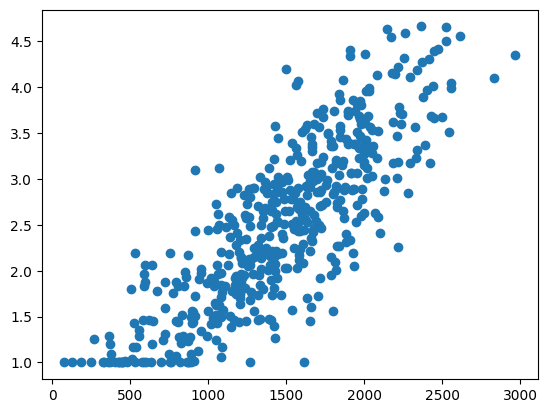

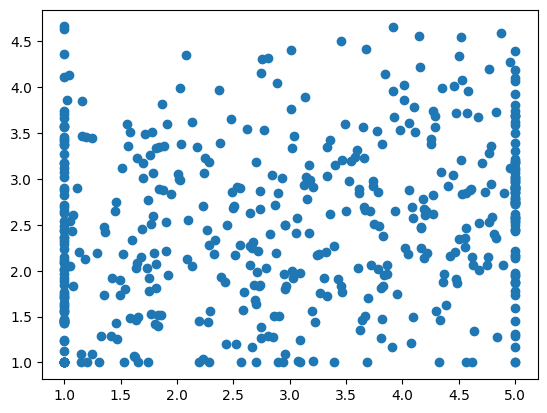

In [24]:
# Vaš kôd ovdje
plt.scatter(exam_score, grades_y)
plt.show()
plt.scatter(grade_in_highschool, grades_y)
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
# Vaš kôd ovdje
r = Ridge(alpha=0.01).fit(grades_X, grades_y)


print(grades_X, grades_y)

print(r.coef_)
print(r.intercept_)


[[1.95800000e+03 1.86706705e+00]
 [1.19800000e+03 2.27906831e+00]
 [2.08100000e+03 2.24977689e+00]
 [1.19900000e+03 4.46642579e+00]
 [7.01000000e+02 4.56782193e+00]
 [1.69900000e+03 5.00000000e+00]
 [2.10300000e+03 3.05281284e+00]
 [2.02800000e+03 5.00000000e+00]
 [1.92600000e+03 4.60906690e+00]
 [1.84500000e+03 2.76893792e+00]
 [1.38800000e+03 1.00000000e+00]
 [1.23900000e+03 3.80966741e+00]
 [1.08000000e+03 1.62323499e+00]
 [2.09000000e+03 4.79451864e+00]
 [8.36000000e+02 1.83384809e+00]
 [1.43800000e+03 1.90590178e+00]
 [1.25100000e+03 5.00000000e+00]
 [5.26000000e+02 1.00000000e+00]
 [5.76000000e+02 1.53396022e+00]
 [1.63200000e+03 1.00000000e+00]
 [1.96700000e+03 4.29069642e+00]
 [9.15000000e+02 2.90390575e+00]
 [1.87000000e+03 5.00000000e+00]
 [9.44000000e+02 4.47084694e+00]
 [5.09000000e+02 1.53807759e+00]
 [9.03000000e+02 1.00000000e+00]
 [1.58400000e+03 3.24208227e+00]
 [4.51000000e+02 4.61615445e+00]
 [1.51000000e+03 3.17707529e+00]
 [1.65100000e+03 3.93337889e+00]
 [1.020000

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler()
scaler.fit(grades_X)
grades_X_fixed = scaler.transform(grades_X) 
scaler.fit(grades_y.reshape(-1,1))
grades_y_fixed = scaler.transform(grades_y.reshape(-1,1)) #1dim->2dim 

r = Ridge(alpha=0.01).fit(grades_X_fixed,grades_y_fixed)

print(r.coef_)
print(r.intercept_)

[[0.81630375 0.15167761]]
[8.62551331e-17]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.hstack((grades_X_fixed,grades_X_fixed[:, -1:]))
print(grades_X_fixed_colinear)



[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
# Vaš kôd ovdje
r = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y_fixed)

print(r.coef_)
print(r.intercept_)

[[0.81630364 0.07583957 0.07583957]]
[8.6255971e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
# Vaš kôd ovdje

w1_lambda1 = [] 
w2_lambda1 = []
w3_lambda1 = []
w1_lambda2 = [] 
w2_lambda2 = []
w3_lambda2 = []

for i in range(0,10):
  grades_X_fixed_colinear_1, grades_X_fixed_colinear_2, grades_y_fixed_1, grades_y_fixed_2 =(
      train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size = 0.5))
  
  reg1 = Ridge(0.01).fit(grades_X_fixed_colinear_1, grades_y_fixed_1)
  print("l=0.01 ",reg1.intercept_, reg1.coef_)
  reg2 = Ridge(1000).fit(grades_X_fixed_colinear_2, grades_y_fixed_2)
  print("l=1000 ",reg2.intercept_, reg2.coef_)
  print()

  w1_lambda1.append(reg1.coef_[0][0])
  w2_lambda1.append(reg1.coef_[0][1])
  w3_lambda1.append(reg1.coef_[0][2])
  w1_lambda2.append(reg2.coef_[0][0])
  w2_lambda2.append(reg2.coef_[0][1])
  w3_lambda2.append(reg2.coef_[0][2])
  
print()
print(np.std(w1_lambda1))
print(np.std(w2_lambda1))
print(np.std(w3_lambda1))
print()
print(np.std(w1_lambda2))
print(np.std(w2_lambda2))
print(np.std(w3_lambda2))
    

l=0.01  [-0.01045662] [[0.79385128 0.06504303 0.06504303]]
l=1000  [0.02408101] [[0.16419725 0.02816756 0.02816756]]

l=0.01  [0.02152062] [[0.80739011 0.0761075  0.0761075 ]]
l=1000  [-0.03106416] [[0.16837778 0.04200572 0.04200572]]

l=0.01  [0.00921447] [[0.814158   0.07673386 0.07673386]]
l=1000  [0.02709743] [[0.16675609 0.03992155 0.03992155]]

l=0.01  [-0.01820559] [[0.83265053 0.07483515 0.07483515]]
l=1000  [0.04983691] [[0.16232085 0.03253696 0.03253696]]

l=0.01  [0.01261939] [[0.79735626 0.08013669 0.08013669]]
l=1000  [0.02386182] [[0.17099764 0.03987356 0.03987356]]

l=0.01  [0.00283109] [[0.81845427 0.04525193 0.04525193]]
l=1000  [-0.01783093] [[0.15003014 0.03454006 0.03454006]]

l=0.01  [-0.04553636] [[0.80086373 0.0614553  0.0614553 ]]
l=1000  [0.05176755] [[0.17269709 0.04318487 0.04318487]]

l=0.01  [0.00861207] [[0.81216485 0.06648337 0.06648337]]
l=1000  [-0.02349788] [[0.1670921 0.0357689 0.0357689]]

l=0.01  [-0.01197704] [[0.81501911 0.04444567 0.04444567]]
l=

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.